In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
def read_data(name):
    data = []
    with open(name, 'r') as f:
        for line in f.readlines():
            index = line.find('\n')
            if index != -1:
                line = line[:index]
            val = float(line)
            data.append(val)
    return data

In [3]:
def get_frames(filename):
    vidcap = cv2.VideoCapture(filename)
    success = True
    data = []
    while success:
        success,image = vidcap.read()
        if success:
            data.append(image)
    return data

In [4]:
speed_vals = read_data('data/train.txt')

## Plot of speed over time

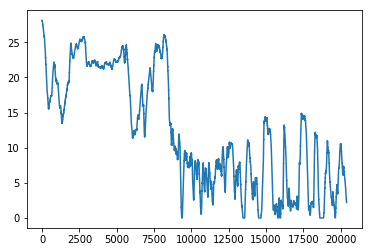

In [5]:
indices = np.arange(len(speed_vals))
plt.plot(indices, speed_vals)
plt.show()

In [4]:
frames = get_frames('data/train.mp4')

In [6]:
test_img = frames[0]

In [14]:
test = cv2.resize(test_img, dsize=(320, 240))

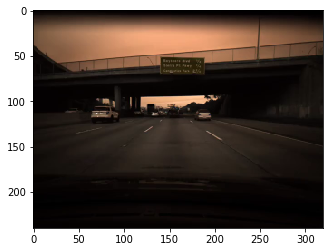

In [15]:
plt.imshow(test)
plt.show()


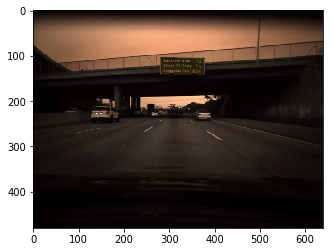

In [16]:
plt.imshow(test_img)
plt.show()


In [8]:
print(len(frames))
print(len(speed_vals))

20400
20400


In [9]:
INPUT_SHAPE = frames[0].shape
INPUT_SHAPE

(480, 640, 3)

## Displaying adjacent frames

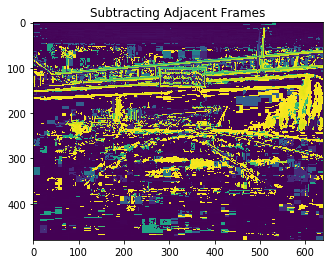

In [10]:
test = frames[1] - frames[0]
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Subtracting Adjacent Frames')
plt.show()

In [11]:
def subtract_frames(arr):
    data = []
    for i in range(1, len(arr)):
        data.append(arr[i] - arr[i-1])
    return np.array(data)

In [12]:
sub_frames = subtract_frames(frames)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(sub_frames, speed_vals[:len(speed_vals)-1], test_size=.2, random_state=6)

In [20]:
np.save('train_X.npy', train_X)
np.save('test_X.npy', test_X)
np.save('train_y.npy', train_y)
np.save('test_y.npy', test_y)